In [31]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [6]:
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

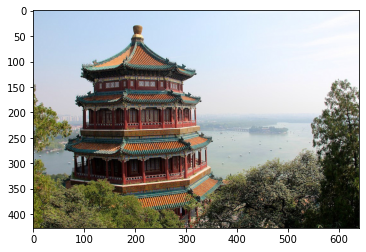

In [24]:
plt.imshow(china)

In [25]:
filters = np.zeros(shape = (7,7,channels, 2), dtype = np.float32)
filters[:,3,:0]=1
filters[3,:,:1]=1

In [26]:
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = "SAME")

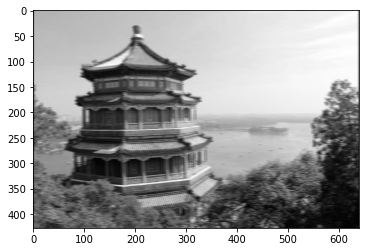

In [27]:
plt.imshow(outputs[0,:,:,1], cmap = "gray")

In [32]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64,7,activation = "relu", padding = "same", input_shape = [28,28,1]), 
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,3,activation = "relu", padding = "same"),
    keras.layers.Conv2D(128,3,activation = "relu", padding = "same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3,activation = "relu", padding = "same"),
    keras.layers.Conv2D(256,3,activation = "relu", padding = "same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dense(128, activation = "relu"), 
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = "softmax")
    
])